# Chapter 5: Linear Regression

## A Basic Linear Regression
##### Example 5-1. Using scikit-learn to do a linear regression

In [34]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy.linalg import inv, qr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

m = [1.7867224]
b = [-16.51923513]


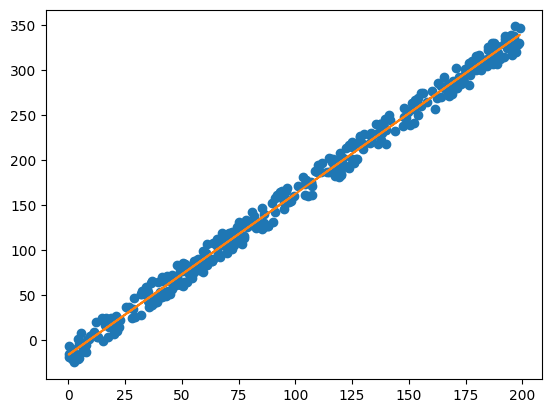

In [7]:
# import points
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')

# Extract input variables X and Output Variables Y
X = df.values[:,:-1]
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f'm = {m}')
print(f'b = {b}')

# Chart
plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

## Residuals and Squared Errors
##### Example 5-2. Calculating the residuals for a given line and data
##### Example 5-3. The residuals for each point

In [57]:
points = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',').itertuples()

# Test with given line
m = 1.93939
b = 4.73333

residual = []
# Calculating the residuals
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    temp = y_actual - y_predict
    residual.append(temp)

print(residual[:20])

[-38.24761100271334, -40.8436725668826, -42.279907415240984, -28.258834871534575, -38.694126153011354, -37.23613386050977, -30.795477083789912, -32.15883305054555, -34.80871779035067, -28.772823435159662, -17.304910595797764, -57.86508729707842, -36.80143367614586, -28.499721858161067, -55.302352163678336, -32.587500438786776, -39.72618126036869, -43.75904940208159, -51.93385041935059, -28.567678650691136]


##### Example 5-4. Calculating the sum of squares for a given line and data

In [15]:
points = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples()

# Test with given line
m = 1.93939
b = 4.73333

# Calculating sum of sqaures
sum_of_squares = 0
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_actual - y_predict)**2
    sum_of_squares += residual_squared

print(f'Sum of Squares = {sum_of_squares}')

Sum of Squares = 28.096969704500005


## Finding the Best Fit Line
### Closed Form Equation
##### Example 5-5. Calculating m and b for a simple linear regression

In [64]:
# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

n = len(points)

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)) \
/ (n*sum(p.x for p in points) - sum(p.x for p in points))

b = (sum(p.y for p in points) / n) - m*sum(p.x for p in points) / n

print(m, b)

3.2323232323232323 -2.377777777777778


### Inverse Matrix Techniques
##### Example 5-6. Using inverse and transposed matrices to fit a linear regression

In [28]:
# Import points
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')

X = df.values[:, :-1].flatten()

# Add placeholder '1' column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

Y = df.values[:, -1]

# Calculate coefficents for slope and intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b)

Y_predict = X_1.dot(b)

[  1.7867224  -16.51923513]


##### Example 5-7. Using QR decomposition to perform a linear regression

In [33]:
# Import points
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')

X = df.values[:, :-1].flatten()

# Add placeholder '1' column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

Y = df.values[:, -1]

# Calculating coefficients for slope and intercept using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b)

[  1.7867224  -16.51923513]


### Gradient Descent
##### Example 5-8. Using gradient descent to find the minimum of a parabola

In [45]:
import random

def f(x):
    return (x - 3)**2 + 4

def dx_f(x):
    return 2*(x - 3)

# Learning rate
L = 0.001

# Number of iterations
iterations = 100_000

# start at a random x
x = random.randint(-15, 15)

for i in range(iterations):
    # get slope
    d_x = dx_f(x)

    # updating x by subtracting the (learning rate) * (slope)
    x -= L * d_x

print(x, f(x))

2.999999999999889 4.0


##### Example 5-9.Performing gradient descent for a linear regression

In [47]:
# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

# Building the model
m = 0.0
b = 0.0

# Learning rate
L = 0.001

# Number of iterations
iterations = 100_000

n = float(len(points))

# Perform gradient descent
for i in range(iterations):
    
    # slope with respect to m
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)

    # slope with respect to b
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)

    # update with respect to b
    m -= L * D_m
    b -= L * D_b

print(f'y = {m}x + {b}')

y = 1.9393939393939548x + 4.733333333333227


##### Example 5-10. Calculating partial derivatives for m and b

In [49]:
from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m * x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


##### Example 5-11. Solving linear regression using SymPy

In [53]:
# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m * x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m).subs(n, len(points) - 1).doit().replace(x, lambda i: points[i].x).replace(y, lambda i: points[i].y)

d_b = diff(sum_of_squares, b).subs(n, len(points) - 1).doit().replace(x, lambda i: points[i].x).replace(y, lambda i: points[i].y)

# Compile using lamdify for faster computation
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Building the model
m = 0.0
b = 0.0

# Learning rate
L = 0.001

# Number of iterations
iterations = 100_000

# Perform gradient descent
for i in range(iterations):
    
    # update m and b
    m -= d_m(m,b) * L
    b -= d_b(m,b) * L

print(f'y = {m}x + {b}')

y = 1.939393939393954x + 4.733333333333231


##### Example 5-12. Plotting the loss function for linear regression

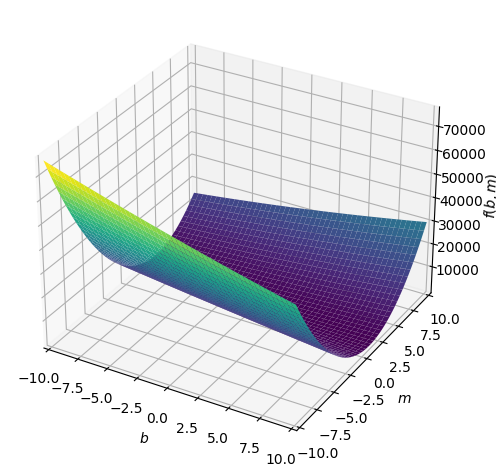

In [65]:
from sympy.plotting import plot3d

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m * x(i) + b - y(i)) ** 2, (i, 0, n)).subs(n, len(points) - 1).doit()\
.replace(x, lambda i: points[i].x).replace(y, lambda i: points[i].y)

plot3d(sum_of_squares)